In [4]:
%pip install spectral
%pip install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 36.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import spectral
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
def append_byte_order(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Check if "byte order" is already present
        if any("byte order" in line.lower() for line in lines):
            print("Byte order already present. No changes made.")
            return

        # Append the line
        with open(file_path, 'a') as file:
            file.write("\nbyte order = 0\n")

        print(f'"byte order = 0" appended to {file_path}')
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


def show_image(img_path,hdr_path):
  img = spectral.envi.open(hdr_path, img_path)
  cube = img.load()
  pca = spectral.principal_components(cube)
  pc1 = pca.transform(cube)[:,:,0]
  pc1_norm = 255 * (pc1 - pc1.min()) / (pc1.max() - pc1.min())
  pc1_norm = pc1_norm.astype(np.uint8)
  false_cl = cv2.applyColorMap(pc1_norm, cv2.COLORMAP_JET)
  plt.imshow(false_cl)

def extract_day_from_filename(filename):
    # Customize this based on your naming convention
    # Example: "healthy_02.hdr" → "02"
    basename = os.path.basename(filename)
    parts = basename.split('_')
    if len(parts) > 1 and parts[1][:2].isdigit():
        return parts[1][:2]  # Extract '02' as day
    return "Unknown"

def process_directory(super_dir):
    paired_files = {}

    for root, _, files in os.walk(super_dir):
        hdr_files = [f for f in files if f.endswith('.hdr')]
        img_files = [f for f in files if f.endswith('.img')]

        for hdr in hdr_files:
            base_name = os.path.splitext(hdr)[0]
            matching_img = base_name + ".img"
            if matching_img in img_files:
                hdr_path = os.path.join(root, hdr)
                img_path = os.path.join(root, matching_img)
                day = extract_day_from_filename(hdr)
                if day not in paired_files:
                    paired_files[day] = []
                paired_files[day].append((img_path, hdr_path))

    # Plotting
    for day in sorted(paired_files):
        images = paired_files[day]
        n = len(images)
        plt.figure(figsize=(4 * n, 4))
        for i, (img_path, hdr_path) in enumerate(images):
            try:
                vis = show_image(img_path, hdr_path)
                plt.subplot(1, n, i + 1)
                plt.imshow(vis)
                plt.title(f'Day {day} - {os.path.basename(img_path)}')
                plt.axis('off')
            except Exception as e:
                print(f"Failed to display {img_path}: {e}")
        plt.suptitle(f"Images for Day {day}")
        plt.tight_layout()
        plt.show()

Failed to display DataFiles/serie infected leaves/infected_02.img: Image data of dtype object cannot be converted to float


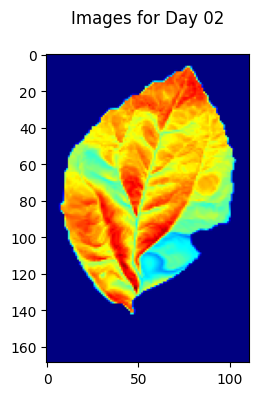

Failed to display DataFiles/serie infected leaves/infected_03.img: Image data of dtype object cannot be converted to float


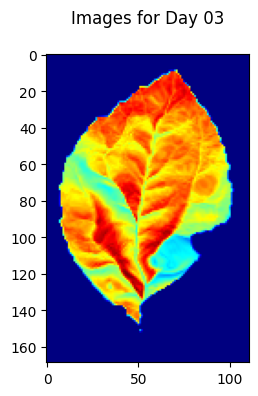

Failed to display DataFiles/serie infected leaves/infected_04.img: Image data of dtype object cannot be converted to float


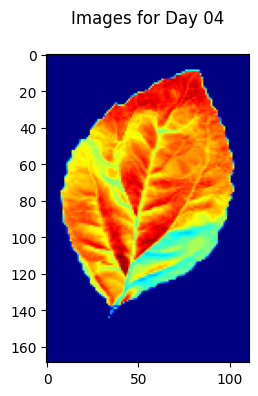

Failed to display DataFiles/serie infected leaves/infected_05.img: Image data of dtype object cannot be converted to float


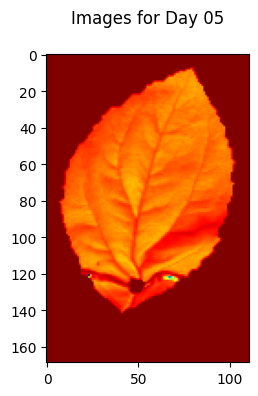

Failed to display DataFiles/serie infected leaves/infected_09.img: Image data of dtype object cannot be converted to float


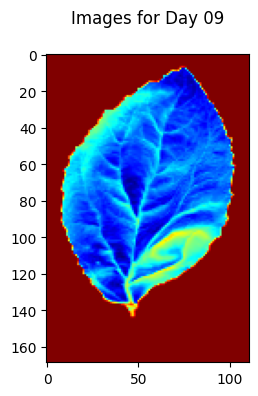

Failed to display DataFiles/serie infected leaves/infected_10.img: Image data of dtype object cannot be converted to float


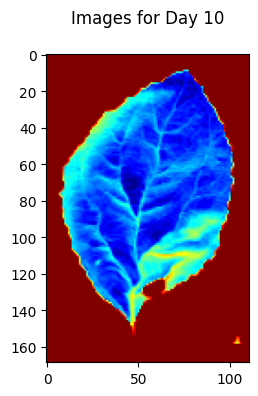

Failed to display DataFiles/serie infected leaves/infected_11.img: Image data of dtype object cannot be converted to float


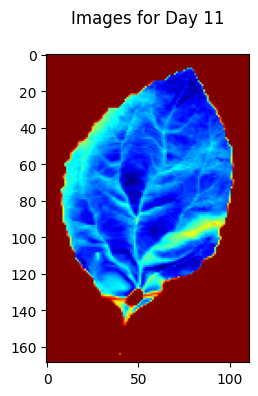

In [11]:
process_directory("DataFiles/serie infected leaves")

Failed to display DataFiles/serie healthy leaves/healthy_02.img: Image data of dtype object cannot be converted to float


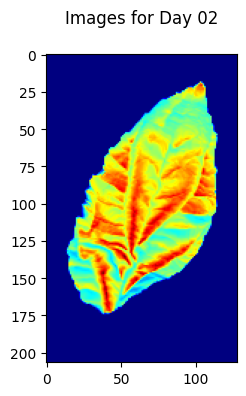

Failed to display DataFiles/serie healthy leaves/healthy_03.img: Image data of dtype object cannot be converted to float


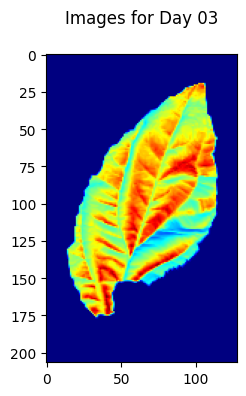

Failed to display DataFiles/serie healthy leaves/healthy_04.img: Image data of dtype object cannot be converted to float


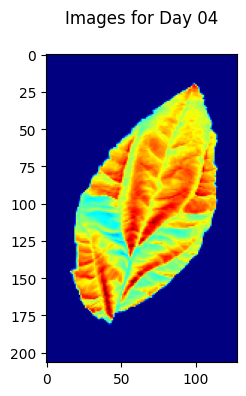

Failed to display DataFiles/serie healthy leaves/healthy_05.img: Image data of dtype object cannot be converted to float


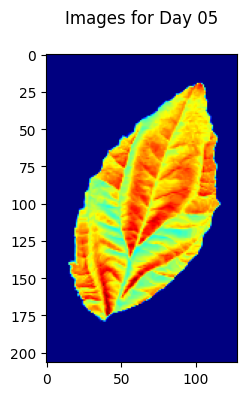

Failed to display DataFiles/serie healthy leaves/healthy_09.img: Image data of dtype object cannot be converted to float


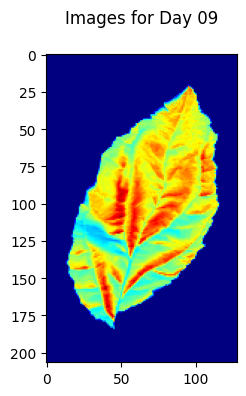

Failed to display DataFiles/serie healthy leaves/healthy_10.img: Image data of dtype object cannot be converted to float


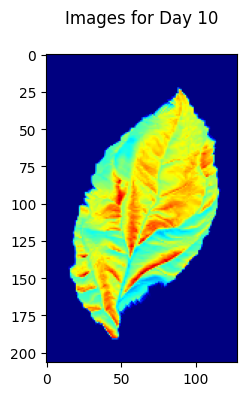

Failed to display DataFiles/serie healthy leaves/healthy_11.img: Image data of dtype object cannot be converted to float


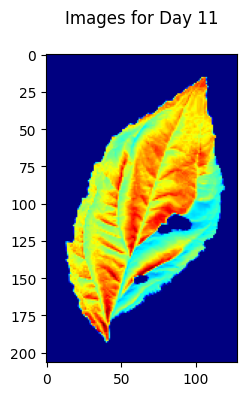

In [12]:
process_directory("DataFiles/serie healthy leaves")

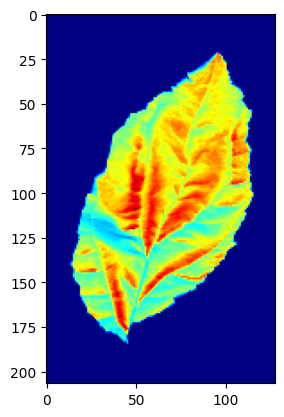

In [13]:
show_image("DataFiles/serie healthy leaves/healthy_09.img","DataFiles/serie healthy leaves/healthy_09.hdr")

In [14]:
img_path = "DataFiles/serie infected leaves/infected_03.img"
hdr_path = "DataFiles/serie infected leaves/infected_03.hdr"

In [15]:
img = spectral.envi.open(hdr_path, img_path)
cube = img.load()

In [16]:
pca = spectral.principal_components(cube)

In [17]:
pc1 = pca.transform(cube)[:,:,0]

pc1_norm = 255 * (pc1 - pc1.min()) / (pc1.max() - pc1.min())
pc1_norm = pc1_norm.astype(np.uint8)

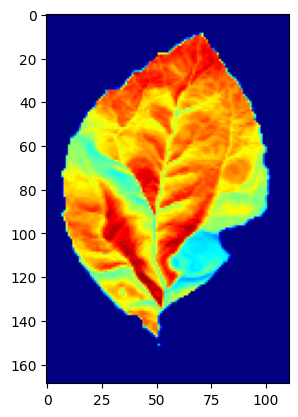

In [18]:
false_cl = cv2.applyColorMap(pc1_norm, cv2.COLORMAP_JET)

plt.imshow(false_cl)

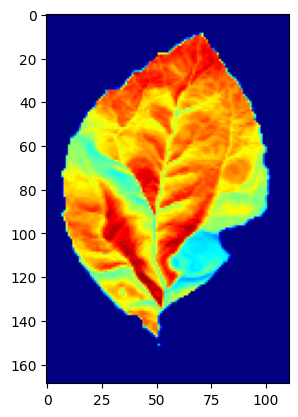

In [19]:
false_cl = cv2.applyColorMap(pc1_norm, cv2.COLORMAP_JET)

plt.imshow(false_cl)

In [20]:
cube.shape

(169, 111, 256)

In [21]:
r_band = 41
g_band = 30
b_band = 10

In [22]:
r = cube[:, :, r_band]
g = cube[:, :, g_band]
b = cube[:, :, b_band]

In [23]:
r1 = (r - r.min()) / (r.max() - r.min())
g1 = (g - g.min()) / (g.max() - g.min())
b1 = (b - b.min()) / (b.max() - b.min())

/tmp/ipykernel_18021/2003079116.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  r1 = (r - r.min()) / (r.max() - r.min())
/tmp/ipykernel_18021/2003079116.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  g1 = (g - g.min()) / (g.max() - g.min())
/tmp/ipykernel_18021/2003079116.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  b1 = (b - b.min()) / (b.max() - b.min())


In [24]:
rgb = np.dstack([r,g,b])

In [25]:
rgb1 = np.dstack([r1,g1,b1])

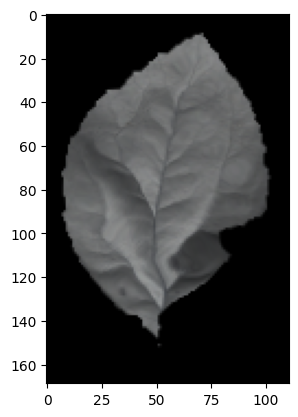

In [26]:
plt.imshow(rgb)

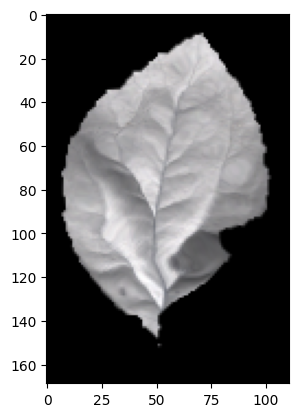

In [27]:
plt.imshow(rgb1)